In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
import numpy as np

In [409]:
df = pd.read_csv("spotify_data.csv")
df = df[df['genre'] == 'hip-hop']
df.drop(columns=["Unnamed: 0"], inplace=True)

In [410]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
32069,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,2012,hip-hop,0.716,0.531,7,-7.355,1,0.1220,0.07030,0.000000,0.2240,0.344,71.994,386907,4
32070,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,82,2012,hip-hop,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
32071,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,2012,hip-hop,0.772,0.413,0,-8.193,0,0.0890,0.03610,0.000000,0.1110,0.211,131.965,246213,4
32072,Frank Ocean,Thinkin Bout You,7DfFc7a6Rwfi3YQMRbDMau,76,2012,hip-hop,0.721,0.339,0,-11.195,1,0.0532,0.40900,0.001530,0.0973,0.200,129.830,200747,4
32073,Kendrick Lamar,Swimming Pools (Drank),6REbwUNlppTfcnV4d4ZoZi,76,2012,hip-hop,0.577,0.447,8,-5.892,1,0.2770,0.00627,0.000220,0.0899,0.189,74.236,247800,4


In [411]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,15703.0,46.315736,13.623475,0.000000,36.0000,47.000,56.000000,96.000
year,15703.0,2012.698529,6.532328,2000.000000,2007.0000,2013.000,2018.000000,2023.000
danceability,15703.0,0.711836,0.135774,0.000000,0.6230,0.731,0.814000,0.986
energy,15703.0,0.671360,0.151464,0.000243,0.5640,0.677,0.787000,0.997
key,15703.0,5.300834,3.708961,0.000000,1.0000,6.000,9.000000,11.000
loudness,15703.0,-6.657922,2.455755,-27.199000,-7.9670,-6.378,-4.992500,0.915
mode,15703.0,0.553334,0.497163,0.000000,0.0000,1.000,1.000000,1.000
speechiness,15703.0,0.209123,0.135097,0.000000,0.0870,0.197,0.304000,0.955
acousticness,15703.0,0.173402,0.189433,0.000009,0.0294,0.102,0.257000,0.967
instrumentalness,15703.0,0.018546,0.104043,0.000000,0.0000,0.000,0.000016,0.961


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15703 entries, 32069 to 1140913
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       15703 non-null  object 
 1   track_name        15703 non-null  object 
 2   track_id          15703 non-null  object 
 3   popularity        15703 non-null  int64  
 4   year              15703 non-null  int64  
 5   genre             15703 non-null  object 
 6   danceability      15703 non-null  float64
 7   energy            15703 non-null  float64
 8   key               15703 non-null  int64  
 9   loudness          15703 non-null  float64
 10  mode              15703 non-null  int64  
 11  speechiness       15703 non-null  float64
 12  acousticness      15703 non-null  float64
 13  instrumentalness  15703 non-null  float64
 14  liveness          15703 non-null  float64
 15  valence           15703 non-null  float64
 16  tempo             15703 non-null  float

In [413]:
df.isnull().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [414]:
train_df = df.sample(frac=0.8, random_state=42)  # Randomly select 80% of the data
test_val_df = df.drop(train_df.index)

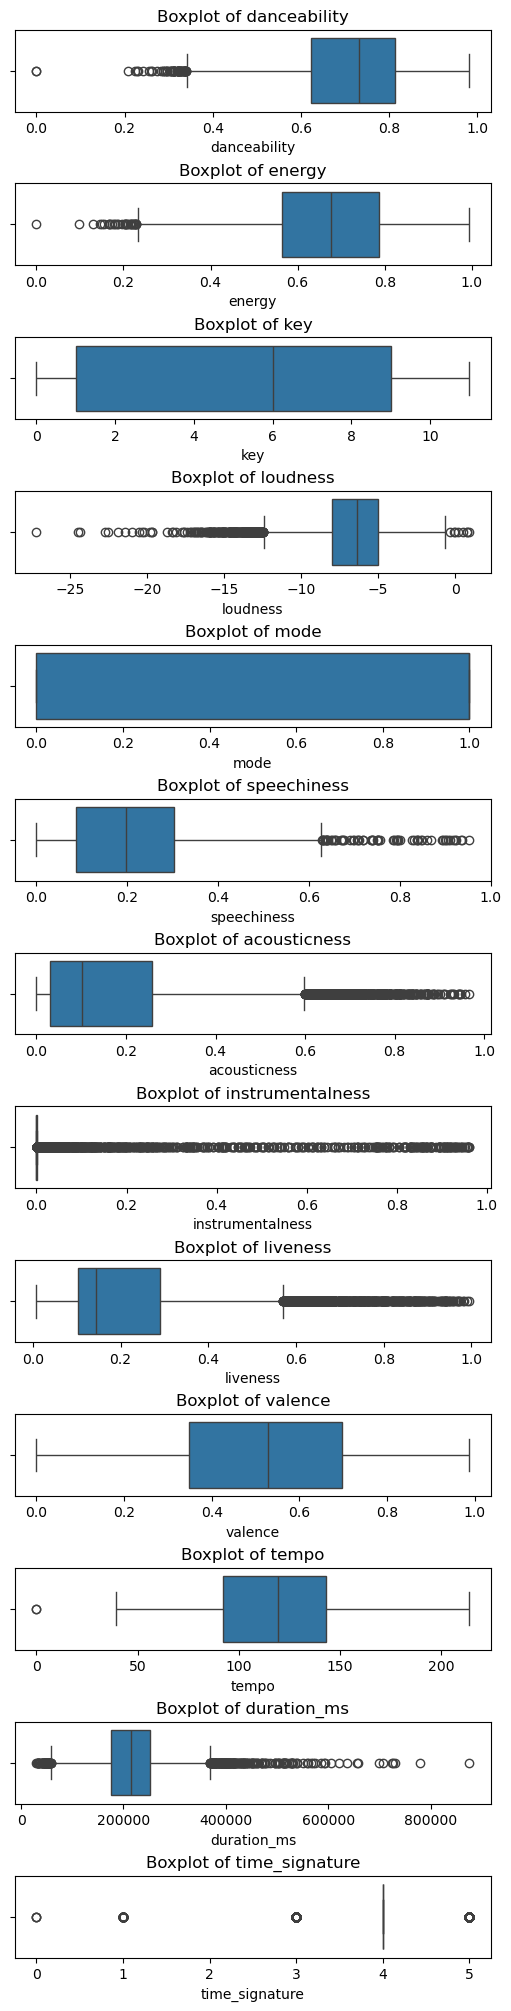

In [415]:
# Features to plot
features = [
    "danceability", "energy", "key", "loudness", "mode", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", 
    "tempo", "duration_ms", "time_signature"
]

# Create subplots
fig, axes = plt.subplots(len(features), 1, figsize=(5, 20), constrained_layout=True)

# Generate boxplots
for ax, feature in zip(axes, features):
    sns.boxplot(x=train_df[feature], ax=ax)
    ax.set_title(f"Boxplot of {feature}")

# Show the plots
plt.show()

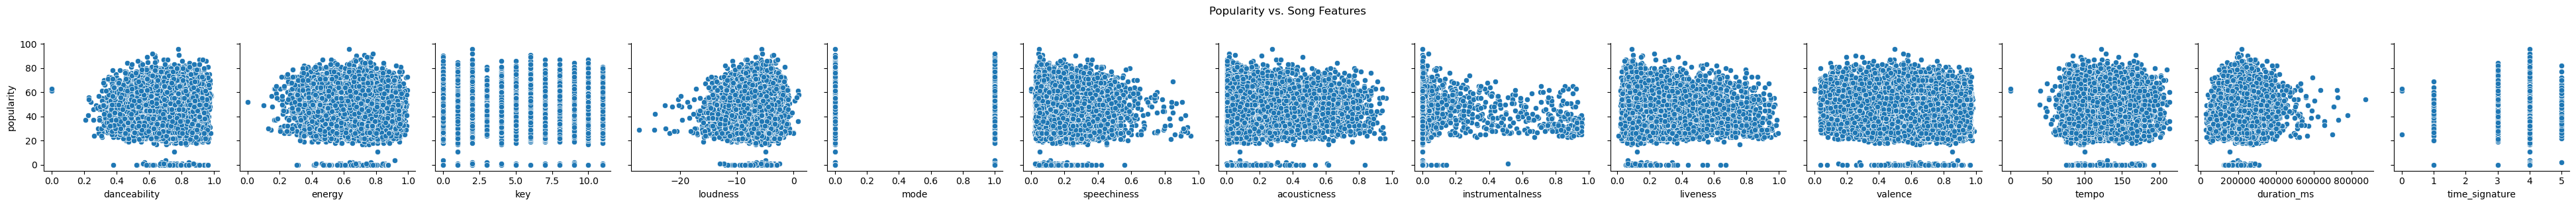

In [416]:
def visualize_popularity_vs_features():
    # Create a pairplot to visualize pairwise relationships between features and popularity
    sns.pairplot(train_df, y_vars=['popularity'], x_vars=features, kind='scatter', diag_kind='kde', height=3)
    
    plt.suptitle('Popularity vs. Song Features', y=1.02)
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_popularity_vs_features()

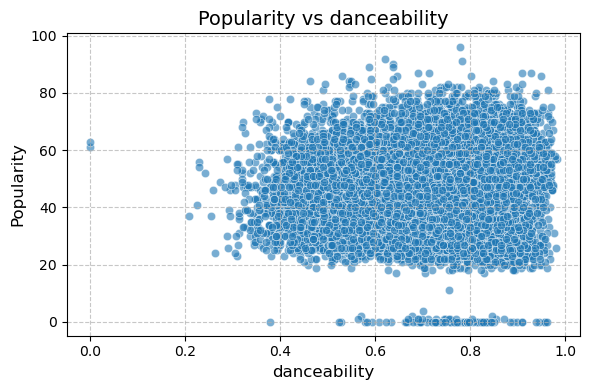

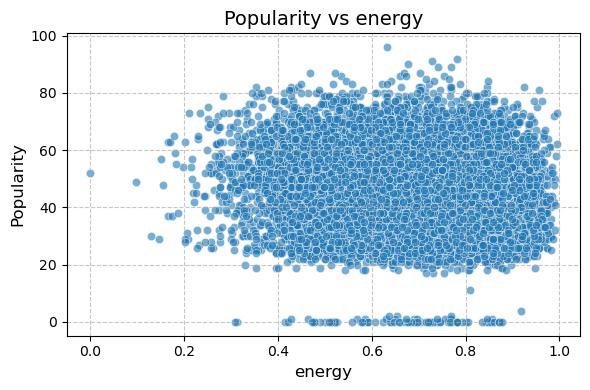

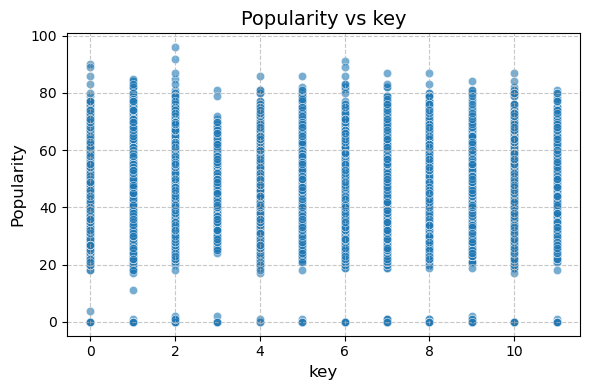

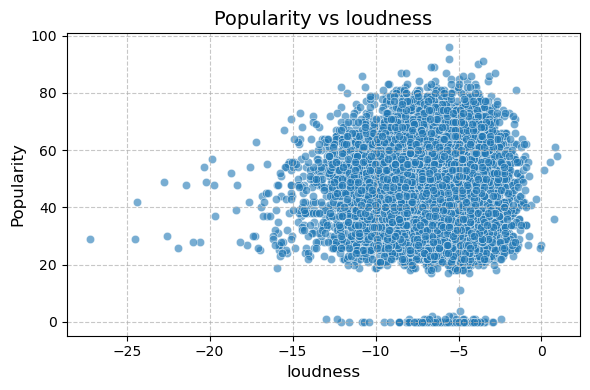

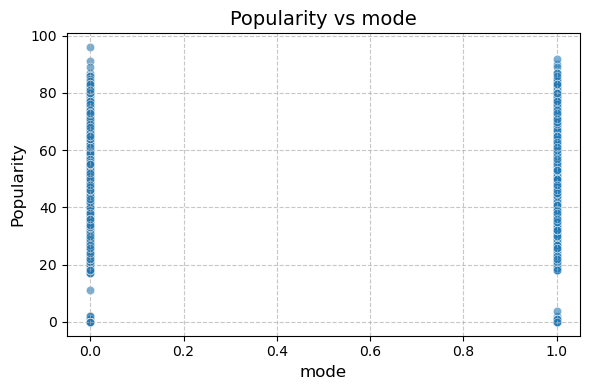

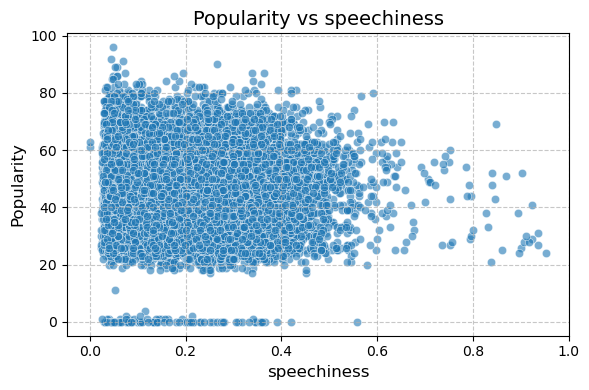

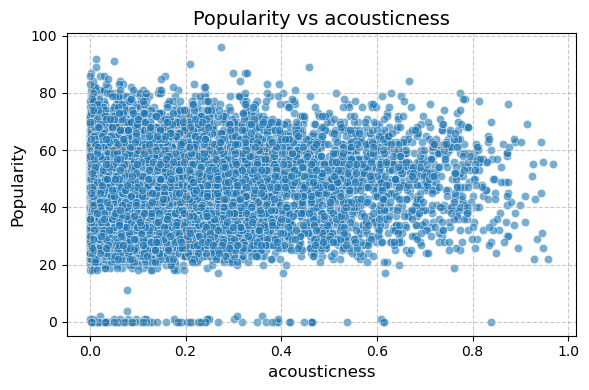

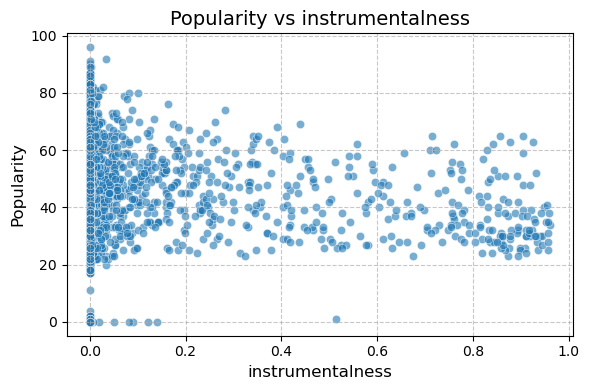

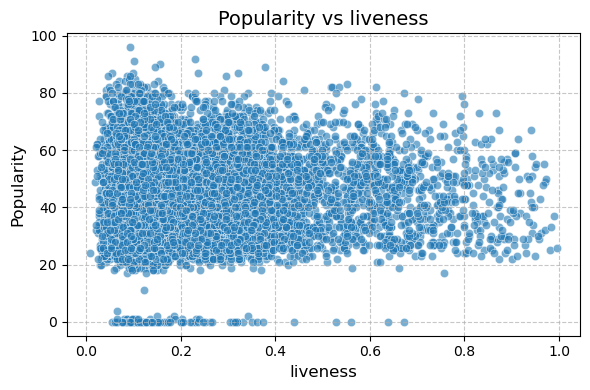

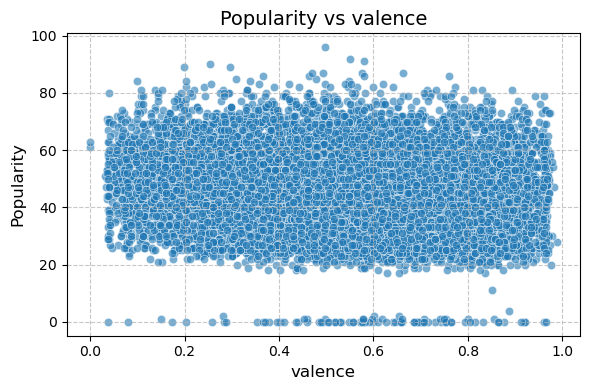

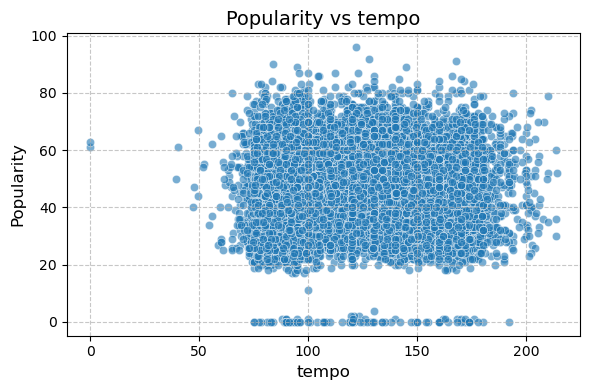

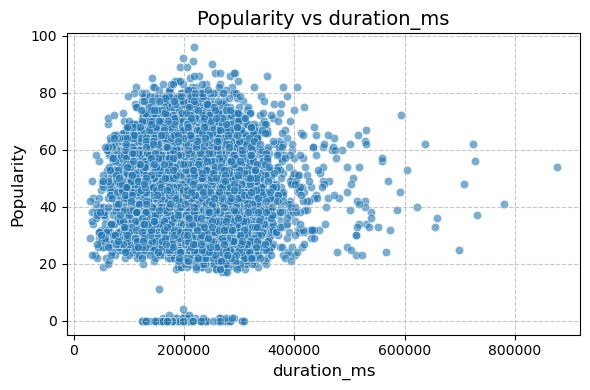

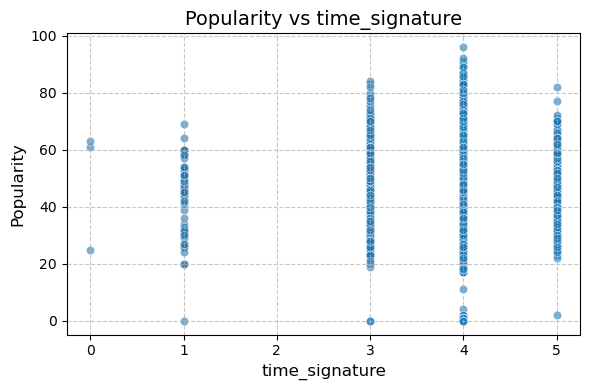

In [417]:
for feature in features:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=train_df, x=feature, y='popularity', alpha=0.6)
        plt.title(f'Popularity vs {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Popularity', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [418]:
train_df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
86341,Chief Keef,Nice,5i2SuSthAorHPP6epfLNjI,34,2013,hip-hop,0.538,0.745,2,-6.282,1,0.0662,0.101000,0.000000,0.5660,0.177,69.905,144262,4
397490,REDZED,Rave in the Grave,3R1bUwe5mTclpush3T5P0a,63,2019,hip-hop,0.734,0.878,1,-2.172,1,0.0396,0.000266,0.000000,0.0973,0.297,86.030,145137,4
1094702,Jowell & Randy,Un Booty Nuevo,3rxoKSXvMJNnbzBJo17kp2,34,2010,hip-hop,0.857,0.668,8,-7.370,1,0.1410,0.068000,0.000018,0.0788,0.728,81.007,280587,4
1140567,Ese 40'z,On Some Barrio Sh!t,3xDi7958FO4IASZ0I3vHCb,37,2011,hip-hop,0.571,0.813,7,-1.780,1,0.2430,0.133000,0.000000,0.8760,0.798,81.299,213665,4
341176,Aaron May,Ride,4QEks3yeZVdjNV1zTqxp1F,58,2018,hip-hop,0.677,0.497,10,-8.064,0,0.3030,0.365000,0.000036,0.1200,0.460,172.164,190605,4


In [419]:
X_train = train_df[[
    "danceability", "energy", "key", "loudness", "mode", "speechiness",
    "acousticness", "liveness", "valence", 
    "tempo", "duration_ms", "time_signature", "year"
]]
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,time_signature,year
86341,0.538,0.745,2,-6.282,1,0.0662,0.101000,0.5660,0.177,69.905,144262,4,2013
397490,0.734,0.878,1,-2.172,1,0.0396,0.000266,0.0973,0.297,86.030,145137,4,2019
1094702,0.857,0.668,8,-7.370,1,0.1410,0.068000,0.0788,0.728,81.007,280587,4,2010
1140567,0.571,0.813,7,-1.780,1,0.2430,0.133000,0.8760,0.798,81.299,213665,4,2011
341176,0.677,0.497,10,-8.064,0,0.3030,0.365000,0.1200,0.460,172.164,190605,4,2018


In [420]:
y_train = (train_df['popularity'] >= train_df['popularity'].median()).astype(int)
y_train

86341      0
397490     1
1094702    0
1140567    0
341176     1
          ..
1140479    0
1094646    0
397242     1
341571     1
285535     1
Name: popularity, Length: 12562, dtype: int64

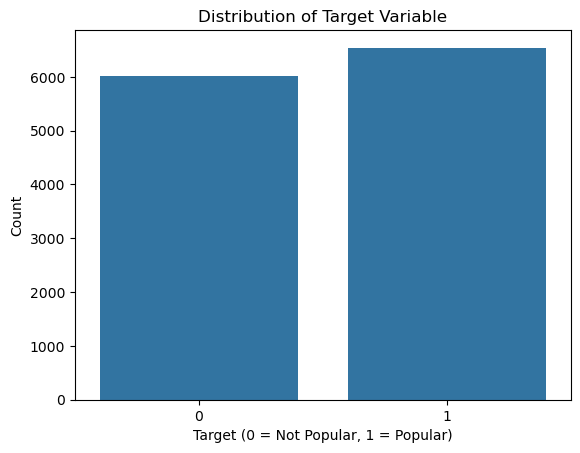

In [421]:
sns.countplot(x=y_train)
plt.xlabel("Target (0 = Not Popular, 1 = Popular)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

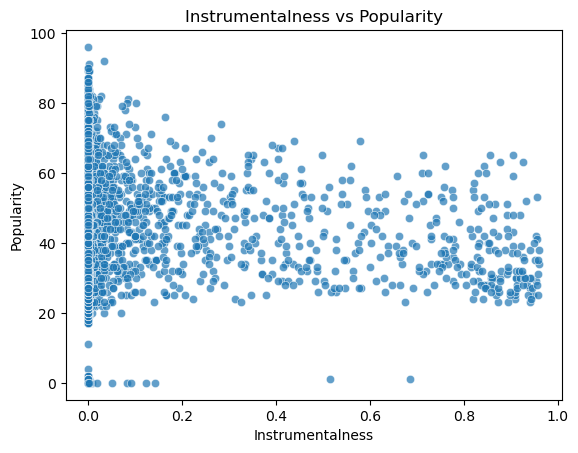

In [422]:
sns.scatterplot(data=df, x="instrumentalness", y="popularity", alpha=0.7)
plt.title("Instrumentalness vs Popularity")
plt.xlabel("Instrumentalness")
plt.ylabel("Popularity")
plt.show()


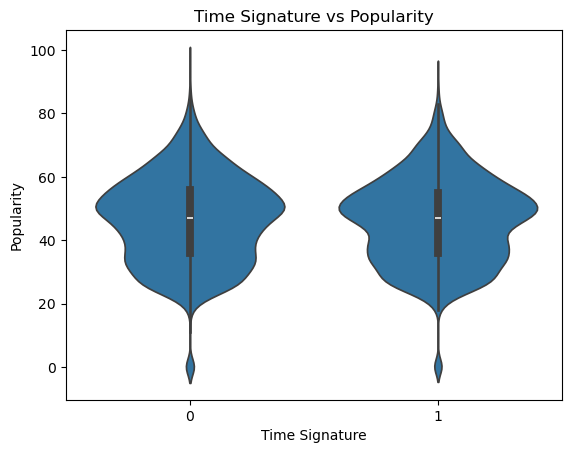

In [423]:
sns.violinplot(x="mode", y="popularity", data=train_df)
plt.xlabel("Time Signature")
plt.ylabel("Popularity")
plt.title("Time Signature vs Popularity")
plt.show()

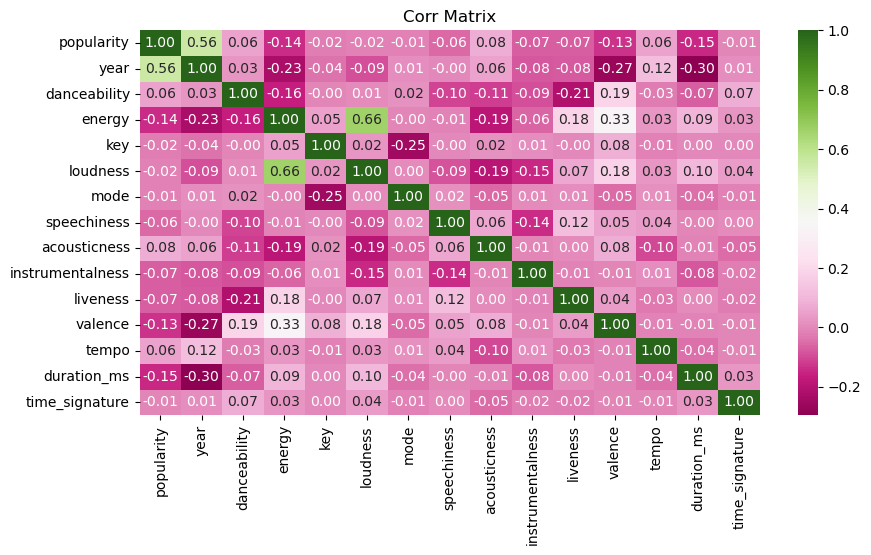

In [424]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', fmt='.2f')
plt.title("Corr Matrix")
plt.show()

In [425]:
X = test_val_df[[
    "danceability", "energy", "key", "loudness", "mode", "speechiness",
    "acousticness", "liveness", "valence", 
    "tempo", "duration_ms", "time_signature", "year"
]]
y = (test_val_df['popularity'] >= 47).astype(int)

In [426]:
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

In [427]:
numerical_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "liveness", "valence", 
    "tempo", "duration_ms"
]
categorical_features = ['year', "key", "time_signature"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create a pipeline with preprocessor and logistic regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])

In [428]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness', 'liveness',
                                                   'valence', 'tempo',
                                                   'duration_ms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['year', 'key',
                                                   'time_signature'])])),
                ('classifier',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [429]:
# Extract the trained classifier from the pipeline
classifier = model.named_steps['classifier']

# Get the coefficients from the classifier
coefficients = classifier.coef_

coefficients = coefficients.flatten()

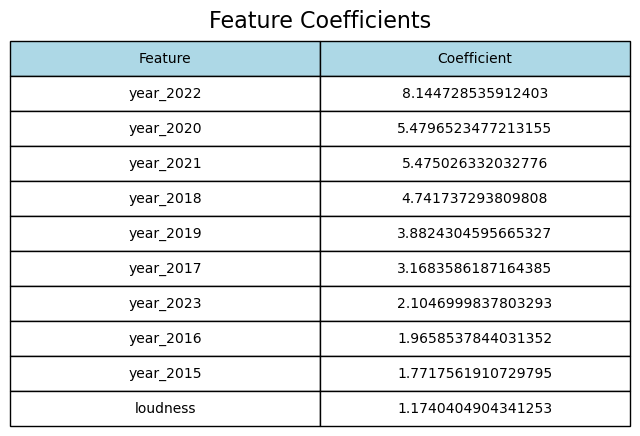

In [430]:
# Retrieve feature names
# 1. Numerical feature names (unchanged)
numerical_features_transformed = numerical_features

# 2. Categorical feature names (transformed by OneHotEncoder)
categorical_transformer = preprocessor.named_transformers_['cat']
categorical_features_transformed = categorical_transformer.get_feature_names_out(categorical_features)

# Combine all feature names in the same order as the ColumnTransformer
all_feature_names = list(numerical_features_transformed) + list(categorical_features_transformed)

# Create a DataFrame mapping coefficients to features
coefficients_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients for better interpretability
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

from matplotlib.table import Table

def display_table_with_matplotlib(dataframe, title="Feature Coefficients"):
    """
    Display a DataFrame as a nicely formatted table using Matplotlib.
    
    Parameters:
    - dataframe: pd.DataFrame, DataFrame to be displayed.
    - title: str, Title of the table.
    """
    fig, ax = plt.subplots(figsize=(8, len(dataframe) * 0.5))  # Adjust size dynamically
    ax.axis('off')  # Turn off the axes
    
    # Create a Table instance
    table = Table(ax, bbox=[0, 0, 1, 1])
    
    # Add header row
    for j, column_name in enumerate(dataframe.columns):
        table.add_cell(0, j, width=0.5, height=0.2, text=column_name, loc='center', facecolor='lightblue')
    
    # Add data rows
    for i, row in enumerate(dataframe.itertuples(index=False), start=1):
        for j, value in enumerate(row):
            table.add_cell(i, j, width=0.5, height=0.2, text=str(value), loc='center', facecolor='white')
    
    ax.add_table(table)
    plt.title(title, fontsize=16, pad=10)
    plt.show()

# Call the function
display_table_with_matplotlib(coefficients_df.iloc[:10])



In [431]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)
print("\nTrain Classification Report:")
print(classification_report(y_train, train_pred))
log_loss_value = log_loss(y_train, train_pred)
print("Log Loss:", log_loss_value)

Train Accuracy: 0.7900811972615825

Train Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      6021
           1       0.85      0.73      0.78      6541

    accuracy                           0.79     12562
   macro avg       0.80      0.79      0.79     12562
weighted avg       0.80      0.79      0.79     12562

Log Loss: 7.566240565761976


In [432]:
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, val_pred))
log_loss_value = log_loss(y_val, val_pred)
print("Log Loss:", log_loss_value)

Validation Accuracy: 0.7803946530872056

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       763
           1       0.83      0.72      0.77       808

    accuracy                           0.78      1571
   macro avg       0.79      0.78      0.78      1571
weighted avg       0.79      0.78      0.78      1571

Log Loss: 7.91537900652159


In [433]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, test_pred))
log_loss_value = log_loss(y_test, test_pred)
print("Log Loss:", log_loss_value)

Test Accuracy: 0.7821656050955414
Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       752
           1       0.84      0.71      0.77       818

    accuracy                           0.78      1570
   macro avg       0.79      0.79      0.78      1570
weighted avg       0.79      0.78      0.78      1570

Log Loss: 7.851547426164373


In [434]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200,random_state=42, n_jobs=-1))
])

In [435]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness', 'liveness',
                                                   'valence', 'tempo',
                                                   'duration_ms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['year', 'key',
                                                   'time_signature'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [436]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)
print("\nTrain Classification Report:")
print(classification_report(y_train, train_pred))
log_loss_value = log_loss(y_train, train_pred)
print("Log Loss:", log_loss_value)

Train Accuracy: 0.9996019742079286

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6021
           1       1.00      1.00      1.00      6541

    accuracy                           1.00     12562
   macro avg       1.00      1.00      1.00     12562
weighted avg       1.00      1.00      1.00     12562

Log Loss: 0.01434630368934792


In [437]:
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, val_pred))
log_loss_value = log_loss(y_val, val_pred)
print("Log Loss:", log_loss_value)

Validation Accuracy: 0.7829408020369192

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       763
           1       0.84      0.71      0.77       808

    accuracy                           0.78      1571
   macro avg       0.79      0.79      0.78      1571
weighted avg       0.79      0.78      0.78      1571

Log Loss: 7.82360649630105


In [438]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, test_pred))
log_loss_value = log_loss(y_test, test_pred)
print("Log Loss:", log_loss_value)

Test Accuracy: 0.7815286624203822
Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       752
           1       0.86      0.70      0.77       818

    accuracy                           0.78      1570
   macro avg       0.79      0.79      0.78      1570
weighted avg       0.79      0.78      0.78      1570

Log Loss: 7.87450516717655


In [ ]:
total_one_hot_encoded_size = preprocessor.named_transformers_['cat'].get_feature_names_out().shape[0]

def build_model(input_dim=len(numerical_features) + total_one_hot_encoded_size):
    model = Sequential([
        # Input Layer
        Dense(256, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.4), 

        # Hidden Layer 1
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Hidden Layer 2
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Hidden Layer 3
        Dense(32, activation='relu'),

        # Output Layer
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.0002) 

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['1'])  

    return model

# Wrap with KerasClassifier
nn_model = KerasClassifier(build_fn=build_model, 
                           epochs=50, 
                           batch_size=100, 
                           verbose=1)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', nn_model)
])

In [440]:
model.fit(X_train, y_train)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5465 - loss: 0.7763
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6920 - loss: 0.5933
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7253 - loss: 0.5446
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7519 - loss: 0.5088
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7526 - loss: 0.5125
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7605 - loss: 0.4962
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7707 - loss: 0.4831
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7718 - loss: 0.4709
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.4741
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4733
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7697 - loss: 0.4772
Epoch 12/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness', 'liveness',
                                                   'valence', 'tempo',
                                                   'duration_ms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['year', 'key',
                                                   'time_signature'])])),
                ('classifier',
                 KerasClassifier(batch_size=100, build_fn=<function build_model at 0x35fa93ba0>, epochs=50))])

In [441]:
history = model.named_steps['classifier'].history_

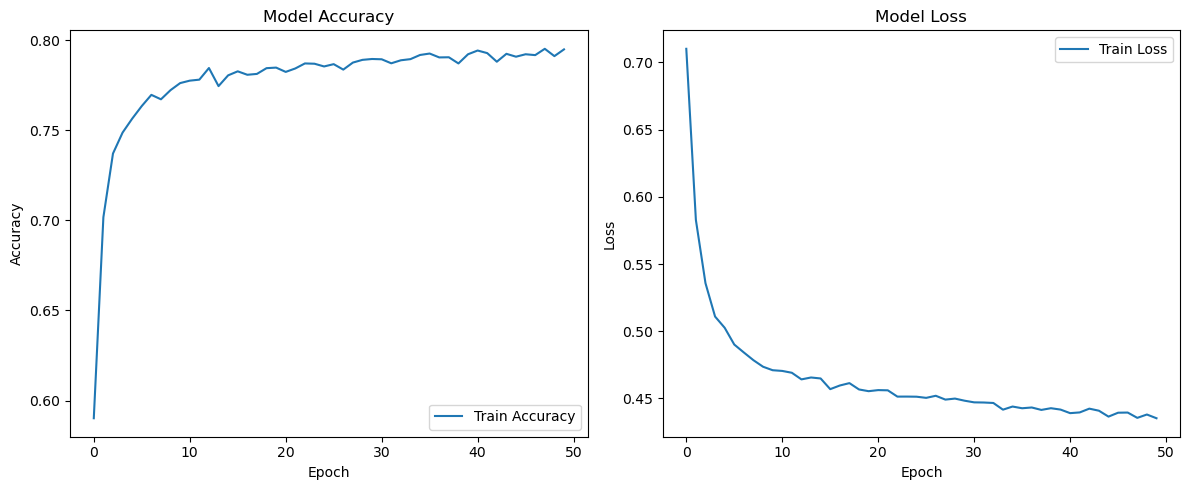

In [442]:
def plot_history(history):
    # Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(history)

In [443]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)
print("\nTrain Classification Report:")
print(classification_report(y_train, train_pred))
log_loss_value = log_loss(y_train, train_pred)
print("Log Loss:", log_loss_value)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
Train Accuracy: 0.8029772329246935

Train Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      6021
           1       0.87      0.73      0.79      6541

    accuracy                           0.80     12562
   macro avg       0.81      0.81      0.80     12562
weighted avg       0.81      0.80      0.80     12562

Log Loss: 7.101420326227109


In [444]:
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, val_pred))
log_loss_value = log_loss(y_val, val_pred)
print("Log Loss:", log_loss_value)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
Validation Accuracy: 0.7791215786123489

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       763
           1       0.84      0.70      0.77       808

    accuracy                           0.78      1571
   macro avg       0.79      0.78      0.78      1571
weighted avg       0.79      0.78      0.78      1571

Log Loss: 7.961265261631858


In [445]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, test_pred))
log_loss_value = log_loss(y_test, test_pred)
print("Log Loss:", log_loss_value)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Test Accuracy: 0.778343949044586
Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       752
           1       0.85      0.70      0.77       818

    accuracy                           0.78      1570
   macro avg       0.79      0.78      0.78      1570
weighted avg       0.79      0.78      0.78      1570

Log Loss: 7.9892938722374325


In [446]:
xgb_model = XGBClassifier(nestimators=500,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

# Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

In [447]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "nestimators" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness', 'liveness',
                                                   'valence', 'tempo',
                                                   'duration_ms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['year', 'key',
                                                   'time_signature'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callba...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, nestimators=500,
                               num_parallel_tree=None, ...))])

In [448]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_accuracy)
print("\nTrain Classification Report:")
print(classification_report(y_train, train_pred))

Train Accuracy: 0.8310778538449292

Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6021
           1       0.90      0.76      0.82      6541

    accuracy                           0.83     12562
   macro avg       0.84      0.83      0.83     12562
weighted avg       0.84      0.83      0.83     12562



In [449]:
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(classification_report(y_val, val_pred))

Validation Accuracy: 0.7816677275620624

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       763
           1       0.83      0.72      0.77       808

    accuracy                           0.78      1571
   macro avg       0.79      0.78      0.78      1571
weighted avg       0.79      0.78      0.78      1571



In [450]:
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, test_pred))

Test Accuracy: 0.7815286624203822
Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       752
           1       0.85      0.71      0.77       818

    accuracy                           0.78      1570
   macro avg       0.79      0.78      0.78      1570
weighted avg       0.79      0.78      0.78      1570



In [451]:
log_loss_models = [8.012251613249608, 7.82360649630105, 7.851547426164373]

In [452]:
log_loss_min = np.min(log_loss_models)
log_loss_max = np.max(log_loss_models)

log_loss_normalized = [(value - log_loss_min) / (log_loss_max - log_loss_min) for value in log_loss_models]

log_loss_normalized

[1.0, 0.0, 0.14811371911069654]